In [44]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import matplotlib.image as mpimg
from skimage.io import imread
# skimage.io.imshow is deprecated use matplotlib.pyplot.imshow instead
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
#import Tensorflow namespaces

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

import pickle




In [45]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [46]:
# Load training set and test set

training_data = unpickle('./cifar-10/data_batch_1')
test_data = unpickle('./cifar-10/test_batch')
print(f"{type(training_data) = }")
print(f"{type(training_data[b'data']) = }, {training_data[b'data'].shape = }, ")
print(f" {training_data[b'data'][0] = }")
# print(training_data.keys())
# print(type(training_data[b"data"]))
# print(training_data[b"data"].shape)
# print(training_data[b"data"])
# print("===================")
# print(training_data[b"data"][1])
# print("===================")
# rs1 = training_data[b"data"].reshape(len(X_train),3,32,32)
# print("+++++++++++++++++++")
# print(rs1[1, 0])
# print("+++++++++++++++++++")
# print(rs1)

type(training_data) = <class 'dict'>
type(training_data[b'data']) = <class 'numpy.ndarray'>, training_data[b'data'].shape = (10000, 3072), 
 training_data[b'data'][0] = array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)


In [47]:
#training_data

In [48]:
# Create training set and test set

X_train = training_data.get(b'data')
train_labels = training_data.get(b'labels')

X_test = test_data.get(b'data')
test_labels = test_data.get(b'labels')

# Reshape into Tensorflow format (number of images, width, height, color channels)

X_train = X_train.reshape((len(X_train),3,32,32)).transpose(0,2,3,1)
X_test  = X_test.reshape((len(X_test),3,32,32)).transpose(0,2,3,1)

print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


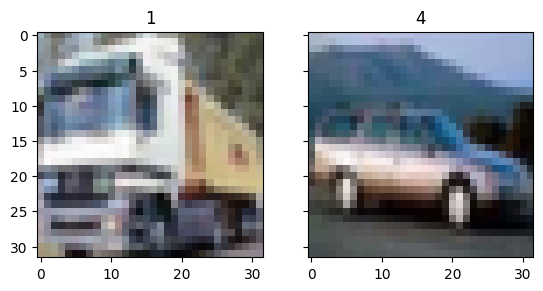

In [56]:
# Show image

fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].set_title("1")
axes[0].imshow(X_train[1])
axes[1].set_title("4")
axes[1].imshow(X_train[4])
# plt.axis('off')  # Hide axes
# plt.show()


In [57]:
# Image normalization

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding of the labels

y_train = to_categorical(train_labels)
y_test = test_labels

In [13]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 30 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/30
125/125 [==============================] - 2s 15ms/step - loss: 2.1632 - accuracy: 0.2566 - val_loss: 2.5927 - val_accuracy: 0.1170
Epoch 2/30
125/125 [==============================] - 2s 14ms/step - loss: 1.7515 - accuracy: 0.3661 - val_loss: 3.2571 - val_accuracy: 0.1295
Epoch 3/30
125/125 [==============================] - 2s 14ms/step - loss: 1.5824 - accuracy: 0.4245 - val_loss: 3.6168 - val_accuracy: 0.1075
Epoch 4/30
125/125 [==============================] - 2s 14ms/step - loss: 1.4734 - accuracy: 0.4658 - val_loss: 2.2259 - val_accuracy: 0.2585
Epoch 5/30
125/125 [==============================] - 2s 14ms/step - loss: 1.4055 - accuracy: 0.4931 - val_loss: 1.6556 - val_accuracy: 0.4060
Epoch 6/30
125/125 [==============================] - 2s 14ms/step - loss: 1.3492 - accuracy: 0.5221 - val_loss: 1.4352 - val_accuracy: 0.4825
Epoch 7/30
125/125 [==============================] - 2s 13ms/step - loss: 1.2937 - accuracy: 0.5309 - val_loss: 1.3463 - val_accuracy: 0.5195

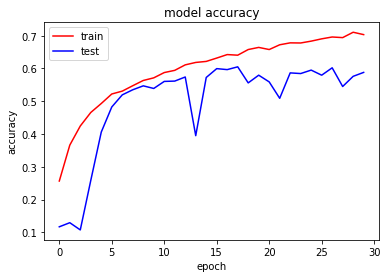

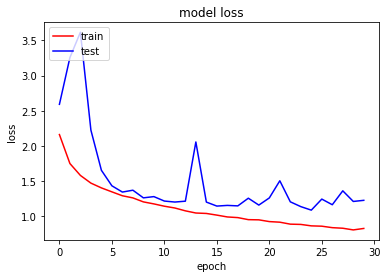

In [14]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# Testing with the test set

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

           0       0.70      0.49      0.58      1000
           1       0.76      0.71      0.73      1000
           2       0.53      0.40      0.46      1000
           3       0.46      0.36      0.40      1000
           4       0.50      0.63      0.56      1000
           5       0.57      0.40      0.47      1000
           6       0.72      0.69      0.70      1000
           7       0.70      0.61      0.65      1000
           8       0.51      0.89      0.65      1000
           9       0.59      0.76      0.66      1000

    accuracy                           0.59     10000
   macro avg  

### Transferlearning via VGG19

In [16]:
modelVGG19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
type(modelVGG19)

tensorflow.python.keras.engine.training.Model

In [17]:
# Convert to Keras model

model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [18]:
# set coefficients to fixed

for layer in model.layers:
    layer.trainable = False

# Add custom dense layers

model.add(Flatten()) 
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',optimizer =adam,metrics=['accuracy'])
#model.summary()

In [20]:
X_train = preprocess_input(X_train)

In [22]:
# Train VGG model
batch_size =256
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size,  validation_split =0.2, epochs=epochs, verbose=1)

Epoch 1/50
32/32 [==============================] - 8s 247ms/step - loss: 2.2361 - accuracy: 0.1621 - val_loss: 2.2262 - val_accuracy: 0.1885
Epoch 2/50
32/32 [==============================] - 8s 247ms/step - loss: 2.2231 - accuracy: 0.1720 - val_loss: 2.2128 - val_accuracy: 0.1505
Epoch 3/50
32/32 [==============================] - 8s 247ms/step - loss: 2.2192 - accuracy: 0.1584 - val_loss: 2.2181 - val_accuracy: 0.2000
Epoch 4/50
32/32 [==============================] - 8s 258ms/step - loss: 2.2127 - accuracy: 0.1743 - val_loss: 2.2103 - val_accuracy: 0.1655
Epoch 5/50
32/32 [==============================] - 8s 257ms/step - loss: 2.2114 - accuracy: 0.1650 - val_loss: 2.2015 - val_accuracy: 0.1480
Epoch 6/50
32/32 [==============================] - 8s 255ms/step - loss: 2.2092 - accuracy: 0.1684 - val_loss: 2.2050 - val_accuracy: 0.1675
Epoch 7/50
32/32 [==============================] - 8s 260ms/step - loss: 2.2065 - accuracy: 0.1710 - val_loss: 2.2003 - val_accuracy: 0.1545
Epoch 